## 전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까?
1. 데이터를 읽어온다
2. 궁금한 지역의 이름을 입력받는다
3. 궁금한 지역의 인구 구조를 저장한다.
4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다.
5. 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화한다.

### 궁금한 지역의 인구 데이터 출력하기(numpy 활용)

In [1]:
import numpy as np
import csv
f = open('age.csv')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)    #3번 인덱스 값부터 슬라이싱
print(home)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 철산3동
[140 167 181 229 271 326 353 348 418 447 422 391 438 414 415 407 424 445
 416 425 481 434 429 449 418 430 428 392 401 353 347 326 351 328 349 358
 340 421 493 552 591 567 548 589 567 594 702 677 636 697 647 665 597 558
 541 525 524 488 512 525 548 523 448 421 404 385 371 266 283 211 189 188
 191 190 172 128 132 121 141 126  94  88 103  66  78  77  57  41  47  39
  21  20  14  13   9   8   6   6   4   0   4]


### 궁금한 지역의 인구 구조 시각화하기

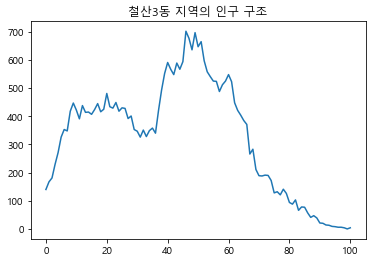

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.title(name+ ' 지역의 인구 구조')
plt.plot(home)
plt.show()

### 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역 찾기
1. 전국의 모든 지역 중 한 곳(B)을 선택한다.
2. 궁금한 지역 A의 0세 인구 비율에서 B의 0세 인구 비율를 뺀다.
3. 2를 100세 이상 인구수에 해당하는 값까지 반복한 후 각각의 차이를 모두 더한다.
4. 전국의 모든 지역에 대해 반복하며 그 차이가 가장 작은 지역을 찾는다

## 우리 동네와 인구 구조가 가장 비슷한 동네를 찾는 코드

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 철산3동


<ipython-input-11-e86cc9f8f684>:23: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype=int)/int(row[2])


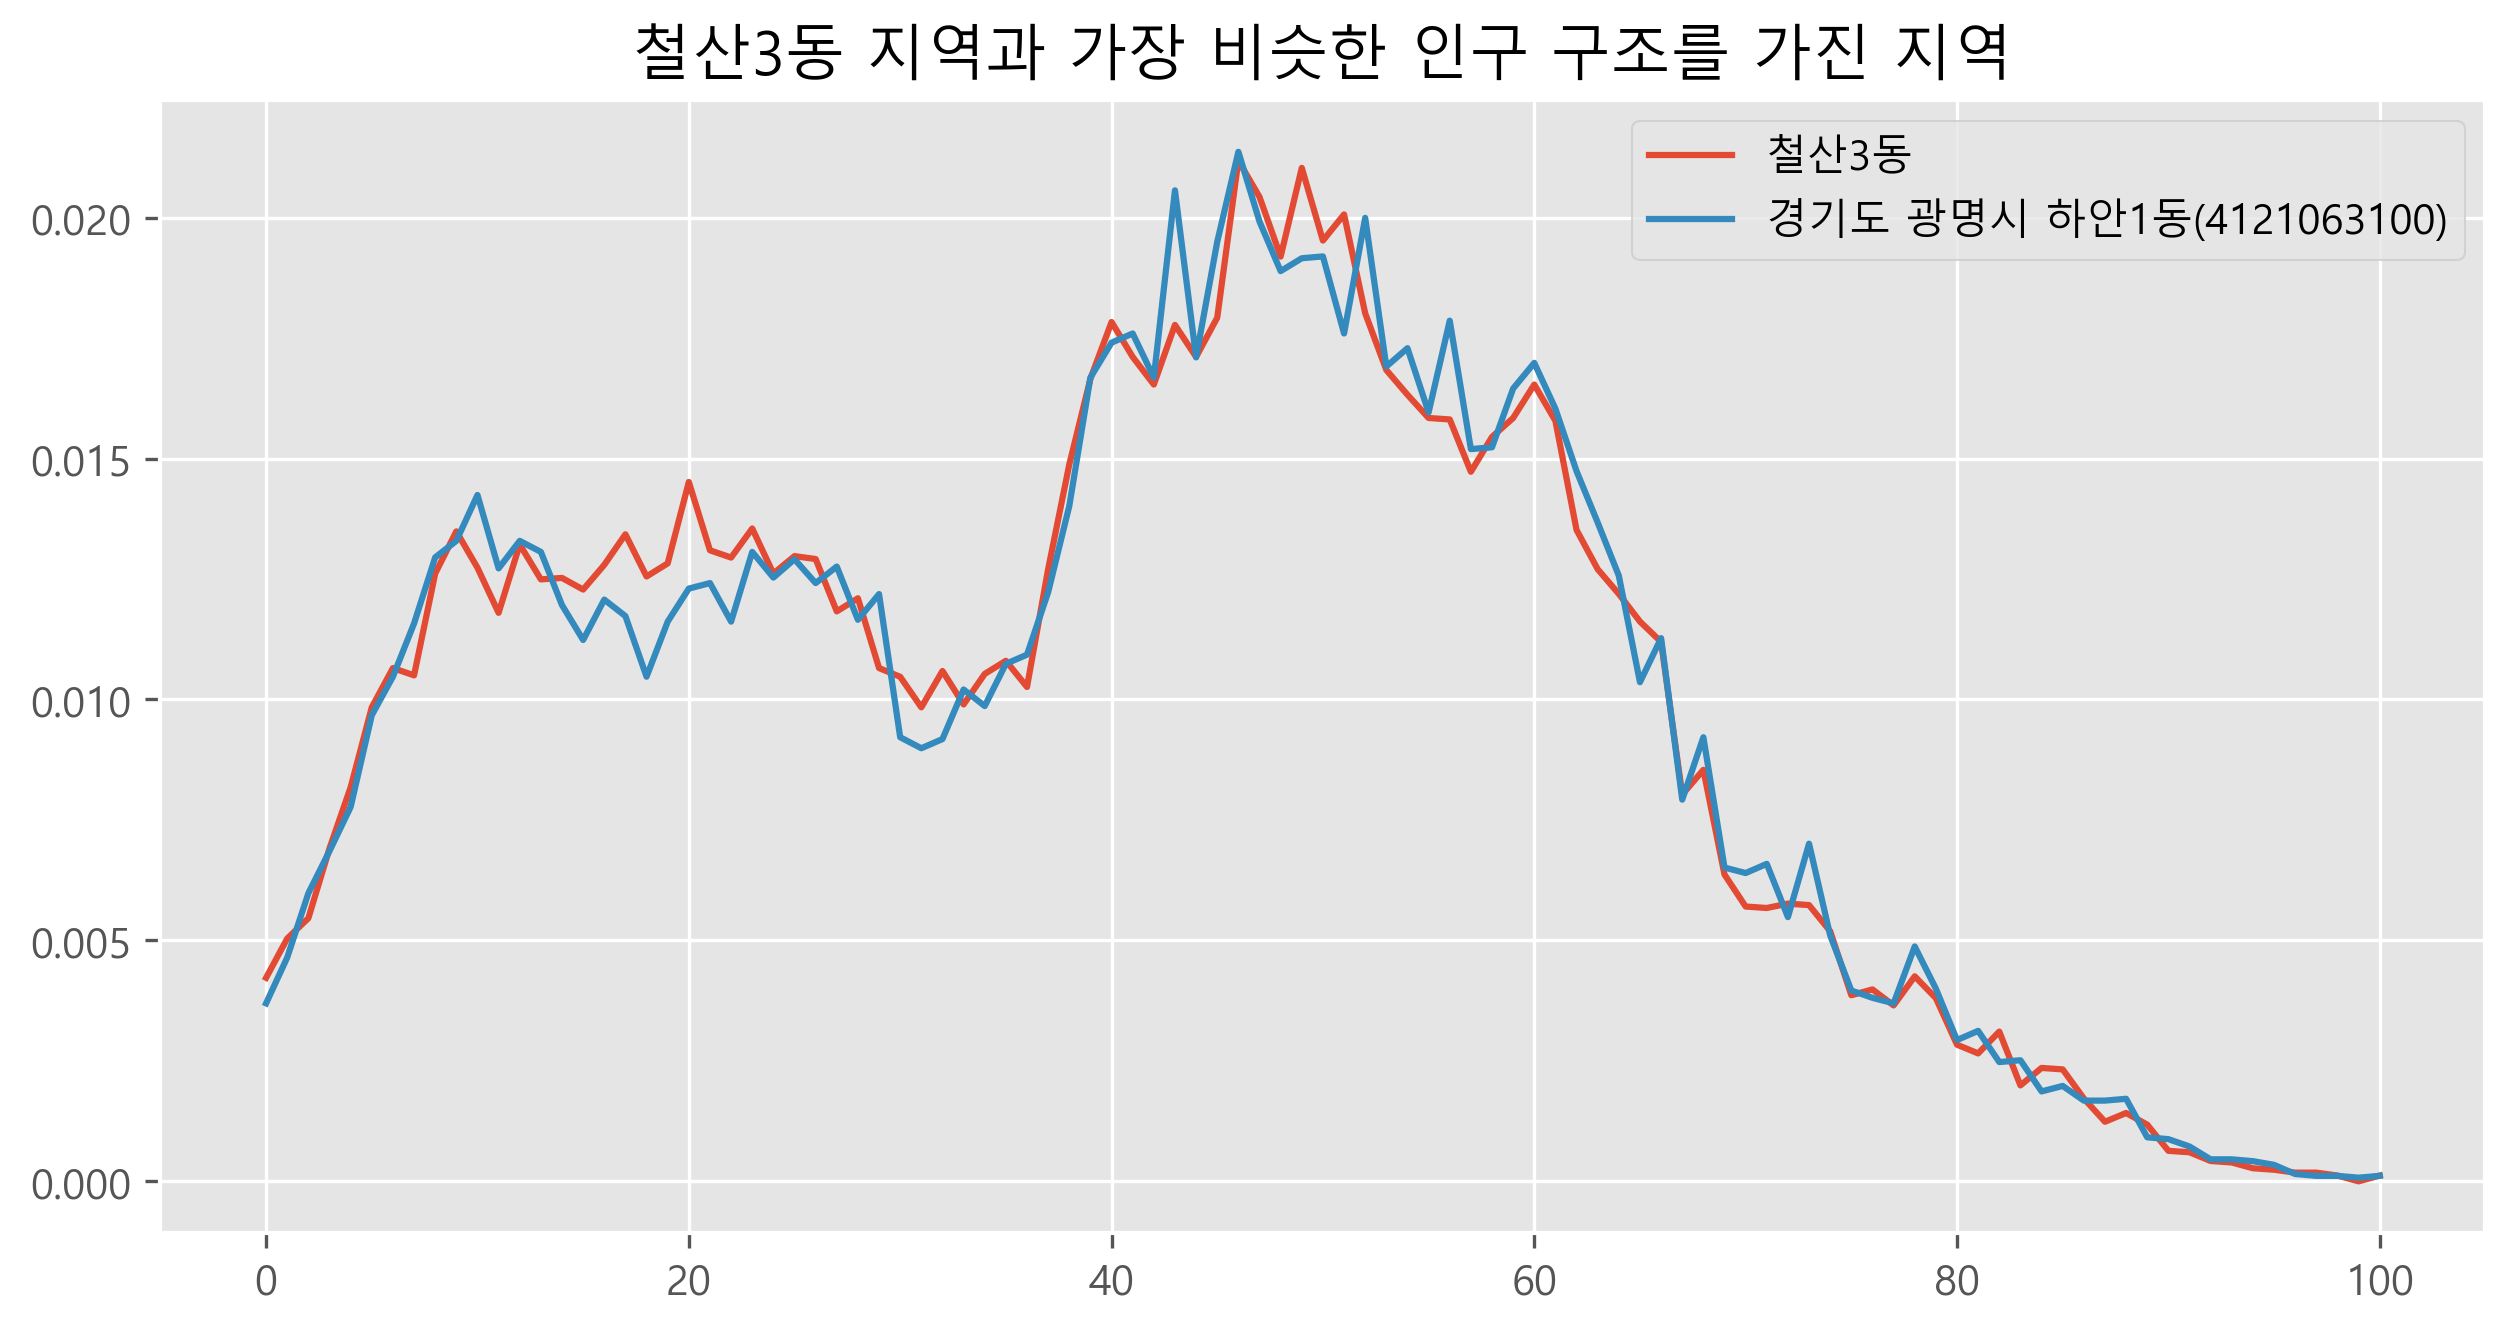

In [11]:
import numpy as np
import csv

# 1. 데이터를 읽어온다.
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)

# 2. 궁금한 지역의 이름을 입력받는다.
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')
mn = 1              # 최솟값을 저장할 변수 생성 및 초기화
result_name = ''    # 최솟값을 갖는 지역의 이름을 저장할 변수 생성 및 초기화
result = 0          # 최솟값을 갖는 지역의 연령대별 인구 비율을 저장할 배열 생성 및 초기화

# 3. 궁금한 지역의 인구 구조를 저장한다.
for row in data:
    if name in row[0]:
        home = np.array(row[3:], dtype=int)/int(row[2])     #사용자로부터 입력받은 지역의 인구 비율을 home에 저장

# 4. 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾는다
for row in data:
    away = np.array(row[3:], dtype=int)/int(row[2])     # 다른 지역의 인구 비율을 away에 저장한 후
    s = np.sum((home-away)**2)                          # home에 저장된 값과 away에 저장된 값의 차이의 합을 계산(제곱하여 음수 제거)
    if s < mn and name not in row[0]:
        mn = s
        result_name = row[0]
        result = away
        
# 5. 궁금한 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화한다.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.title(name+ ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()